In [1]:
from datasets import FreiburgDataset
import os
import numpy as np
from PIL import Image
import torch
import torchvision
import copy, csv
from deeplabmodel import DeepLabv3Model
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

<AxesSubplot:xlabel='epoch'>

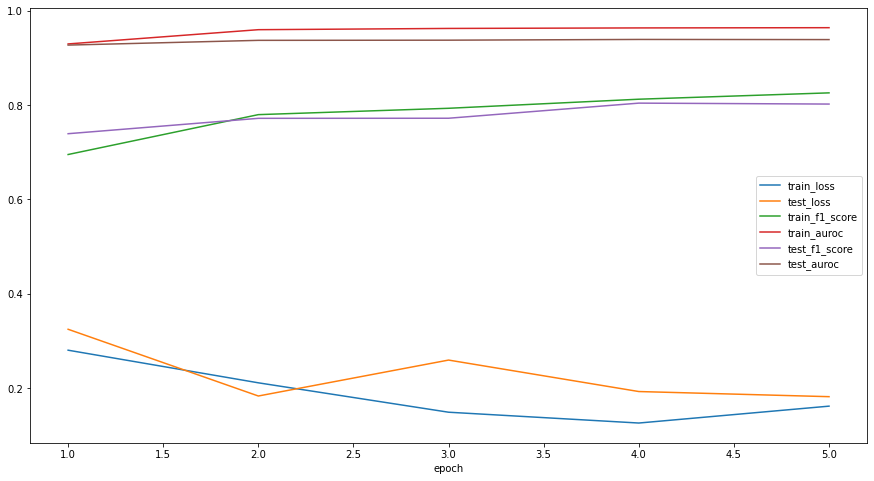

In [2]:
df = pd.read_csv('results/log.csv')
df.plot(x='epoch',figsize=(15,8))

In [4]:
model = torch.load('results/deeplabv3_model.pt', map_location=torch.device('cpu')).to('cpu')
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [54]:
fd_train = FreiburgDataset("data/freiburg/train")
fd_test = FreiburgDataset("data/freiburg/test")
batch_size=1
dataloader = torch.utils.data.DataLoader(fd_test, batch_size=batch_size, shuffle=True, collate_fn=cf)
test_img, test_mask = next(iter(dataloader))

In [55]:
with torch.no_grad():
    mask_pred = model(test_img)['out']

In [57]:
test_img = dn(test_img)[0].transpose(1,2,0)
test_mask = dn(test_mask)[0]
mask_pred = dn(mask_pred)[0]

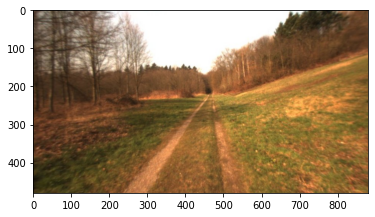

In [58]:
plt.imshow(test_img)

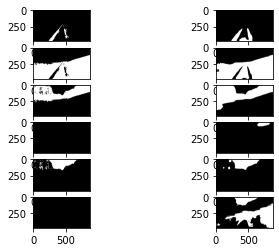

In [61]:
fig,axs=plt.subplots(6,2)
for i in range(6):
    axs[i,0].imshow(test_mask[i], cmap='gray')
    axs[i,1].imshow(nut(mask_pred[i]), cmap='gray')

In [62]:
fd_test.obj_names

AttributeError: 'FreiburgDataset' object has no attribute 'obj_names'